# Vehicle Complaints 

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

## Path to complaints dataset

In [2]:
complaints_dataset = '../Processed_Data/API/Complaints.pkl'

## Load Complaints Data

In [3]:
df_complaints = pd.read_pickle(complaints_dataset)
print(df_complaints.shape)
df_complaints.head()

(750742, 11)


,manufacturer,productMake,productModel,productYear,type,components,crash,dateComplaintFiled,fire,numberOfDeaths,numberOfInjuries
0,Mazda Motor Corp.,MAZDA,MAZDASPEED3,2010,Vehicle,"STRUCTURE,ENGINE",False,2019-10-30,False,0,0
1,Mazda Motor Corp.,MAZDA,MAZDASPEED3,2010,Vehicle,"POWER TRAIN,ELECTRICAL SYSTEM,AIR BAGS",False,2019-04-14,False,0,0
2,Mazda Motor Corp.,MAZDA,MAZDASPEED3,2010,Vehicle,EXTERIOR LIGHTING,False,2018-09-02,False,0,0
3,Mazda Motor Corp.,MAZDA,MAZDASPEED3,2010,Vehicle,"SUSPENSION,AIR BAGS",False,2017-08-16,False,0,1
4,Mazda Motor Corp.,MAZDA,MAZDASPEED3,2010,Vehicle,SEATS,False,2017-02-15,False,0,0


## Detect the new energy data

In [4]:
NEV_Symbol = ['HYBRID','ELEC','HEV ','HV ','EV ',' HEV',' HV',' EV','ENERGI','ECO','PLUG-IN','TESLA','PLUGIN']
pattern = '|'.join(NEV_Symbol)
pattern

'HYBRID|ELEC|HEV |HV |EV | HEV| HV| EV|ENERGI|ECO|PLUG-IN|TESLA|PLUGIN'

In [5]:
# Determine whether New Energy vehicle or Traditional vehicle, add new column called fuel_type.
df_complaints['fuel_type'] = df_complaints.productModel.str.contains(pattern)
mapping = {False: 'Traditional', True:'New energy'}
df_complaints.replace( {'fuel_type': mapping}, inplace=True )
df_complaints.head()

,manufacturer,productMake,productModel,productYear,type,components,crash,dateComplaintFiled,fire,numberOfDeaths,numberOfInjuries,fuel_type
0,Mazda Motor Corp.,MAZDA,MAZDASPEED3,2010,Vehicle,"STRUCTURE,ENGINE",False,2019-10-30,False,0,0,Traditional
1,Mazda Motor Corp.,MAZDA,MAZDASPEED3,2010,Vehicle,"POWER TRAIN,ELECTRICAL SYSTEM,AIR BAGS",False,2019-04-14,False,0,0,Traditional
2,Mazda Motor Corp.,MAZDA,MAZDASPEED3,2010,Vehicle,EXTERIOR LIGHTING,False,2018-09-02,False,0,0,Traditional
3,Mazda Motor Corp.,MAZDA,MAZDASPEED3,2010,Vehicle,"SUSPENSION,AIR BAGS",False,2017-08-16,False,0,1,Traditional
4,Mazda Motor Corp.,MAZDA,MAZDASPEED3,2010,Vehicle,SEATS,False,2017-02-15,False,0,0,Traditional


In [6]:
df_complaints.groupby('fuel_type').size()

fuel_type
New energy       5556
Traditional    745186
dtype: int64

# Brand
## Complaints count X makes & manufacturer
### New Energy Vehicle

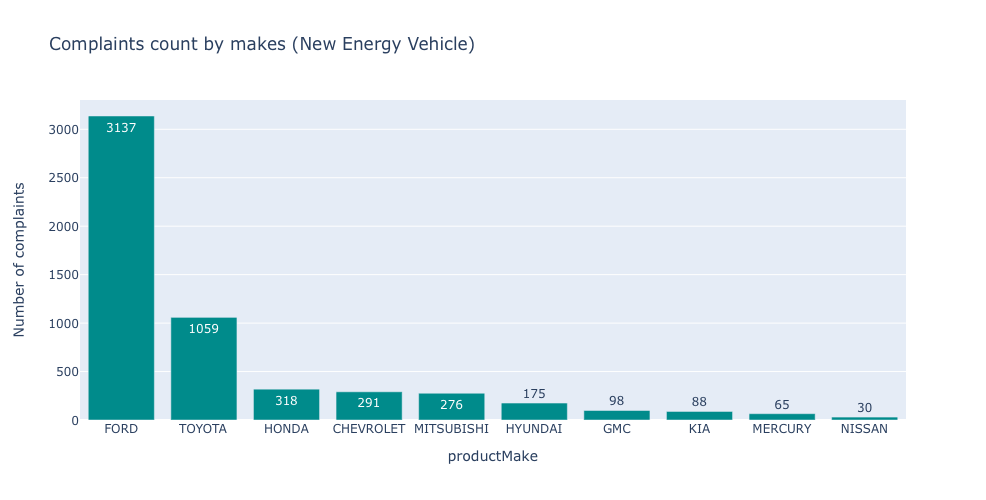

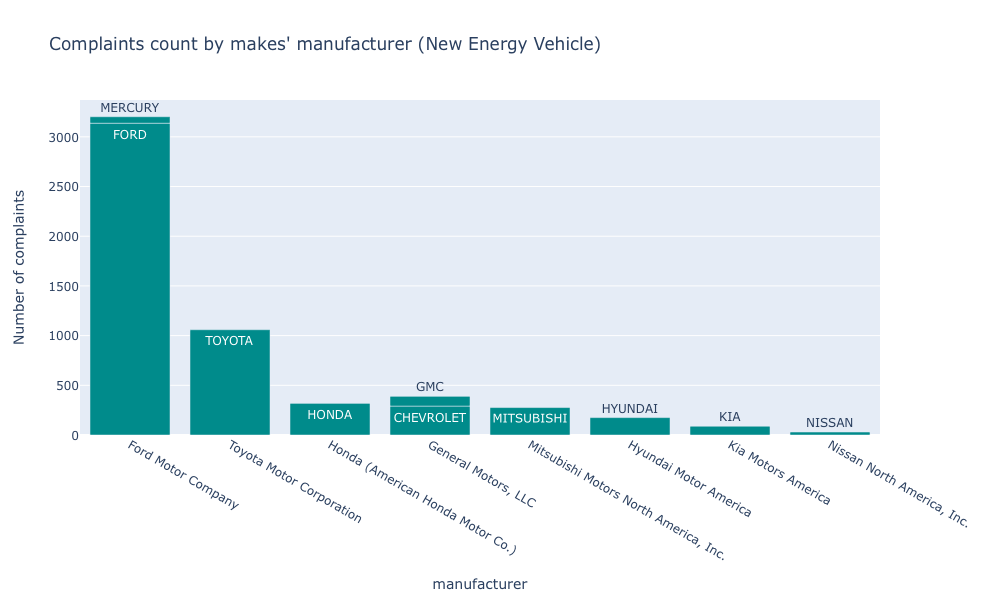

In [100]:
complaint_NEV = df_complaints[df_complaints['fuel_type']=='New energy'][['manufacturer','productMake']]

complaint_num_of_makes_NEV = pd.DataFrame(complaint_NEV.groupby(['productMake']).size().sort_values(ascending=False))

complaint_num_of_manufacturer_NEV = pd.DataFrame(complaint_NEV.groupby(['manufacturer','productMake']).size().sort_values(ascending=False)).reset_index()

top_10 = complaint_num_of_makes_NEV.head(10)

fig = px.bar(top_10, x=top_10.index, y=top_10[0],
             #pattern_shape=top_10['productMake'],
             text_auto='',
             color_discrete_sequence=["darkcyan"],
             title="Complaints count by makes (New Energy Vehicle)",
             labels={"0": "Number of complaints"},
             height=500)
fig.show()

top_10 = complaint_num_of_manufacturer_NEV.head(10)

fig = px.bar(top_10, x=top_10['manufacturer'], y=top_10[0],
             text=top_10['productMake'],
             color_discrete_sequence=["darkcyan"],
             #pattern_shape=top_10['productMake'],
             #text_auto='.2s',
             title="Complaints count by makes' manufacturer (New Energy Vehicle)",
             labels={"0": "Number of complaints"},
             height=600)
fig.show()

### Traditional Vehicle

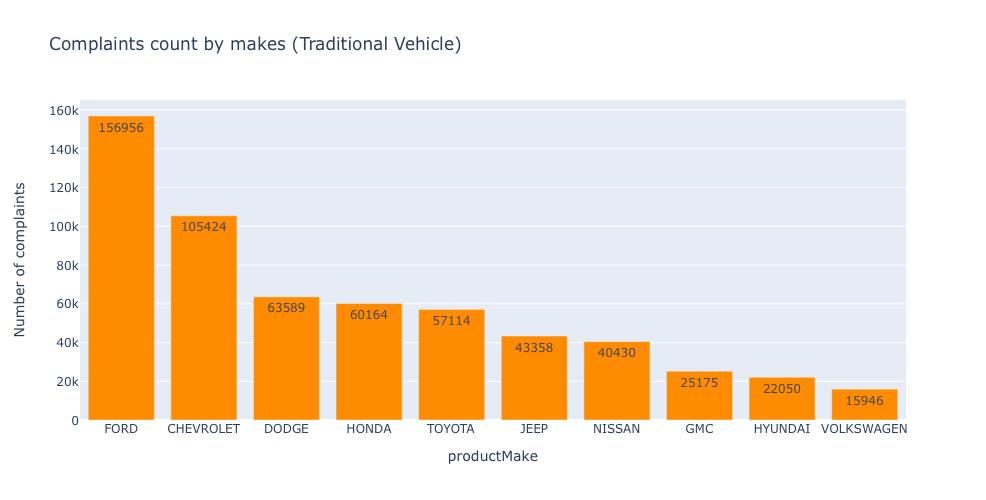

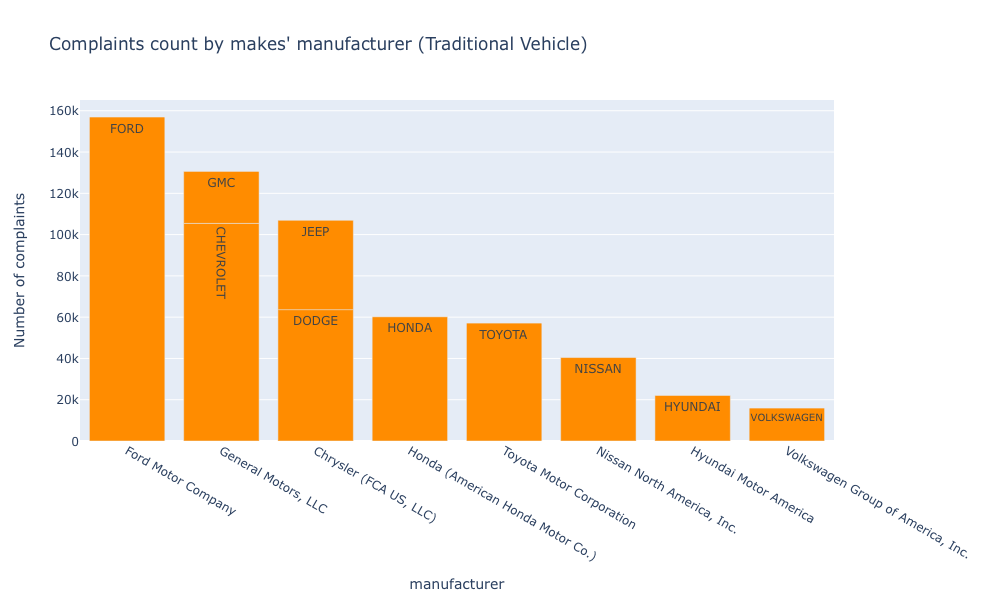

In [97]:
complaint_TV = df_complaints[df_complaints['fuel_type']=='Traditional'][['manufacturer','productMake']]

complaint_num_of_makes_TV = pd.DataFrame(complaint_TV.groupby(['productMake']).size().sort_values(ascending=False))

complaint_num_of_manufacturer_TV = pd.DataFrame(complaint_TV.groupby(['manufacturer','productMake']).size().sort_values(ascending=False)).reset_index()

top_10 = complaint_num_of_makes_TV.head(10)

fig = px.bar(top_10, x=top_10.index, y=top_10[0],
             color_discrete_sequence=["darkorange"],
             text_auto='',
             title="Complaints count by makes (Traditional Vehicle)",
             labels={"0": "Number of complaints"},
             height=500)
fig.show()


top_10 = complaint_num_of_manufacturer_TV.head(10)

fig = px.bar(top_10, x=top_10['manufacturer'], y=top_10[0],
             text=top_10['productMake'],
             color_discrete_sequence=["darkorange"],
             title="Complaints count by makes' manufacturer (Traditional Vehicle)",
             labels={"0": "Number of complaints"},
             height=600)
fig.show()

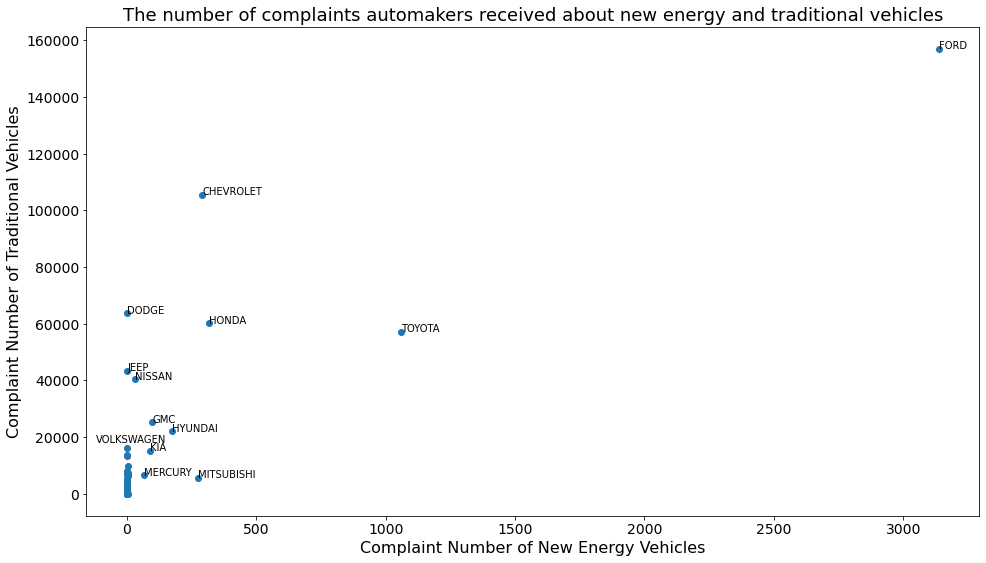

In [451]:
All_complaint_count = pd.concat([complaint_num_of_makes_NEV['NEV_complaint_num'].rename('New_Energy'),
                                 complaint_num_of_makes_TV['TV_complaint_num'].rename('Traditional')],
                                axis=1)\
                        .fillna(0)

fig, ax = plt.subplots(figsize=(16, 9))

# Draw scatter plot
#plt.scatter(data=All_complaint_ratio, x=All_complaint_ratio['New_Energy'], y=All_complaint_ratio['Traditional'],s=50)

plt.scatter(data=All_complaint_count, x='New_Energy', y='Traditional')
             

# Label each node
All_complaint_count.sort_values(by='Traditional',ascending=False,inplace=True)

for i, txt in enumerate(All_complaint_count[All_complaint_count['Traditional']>20000].index):
    ax.annotate(txt, (All_complaint_count['New_Energy'][i], All_complaint_count['Traditional'][i]))
ax.annotate('KIA', (88.0,15188))
ax.annotate('MITSUBISHI', (276.0,5618))
ax.annotate('MERCURY', (65.0,6531))
ax.annotate('VOLKSWAGEN', (-120,18050))


plt.title("The number of complaints automakers received about new energy and traditional vehicles",fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Complaint Number of New Energy Vehicles", fontsize=16)
plt.ylabel("Complaint Number of Traditional Vehicles", fontsize=16)

plt.show()

# Save as png image
fig.savefig('./Outputs/Complaint_count_by_makes_by_fuel_type.png', format='png')

# Complaints Ratio 
**\*Complaint per model of each maker\***
## Complaints Ratio X Maker

### Number of model for each maker

In [233]:
model_num_of_makes_NEV = df_complaints[df_complaints['fuel_type']=='New energy'][['productMake','productModel']]\
                                    .groupby('productMake')\
                                    .nunique()\
                                    .sort_values(by='productModel',ascending=False)\
                                    .rename(columns={'productModel':'NEV_model_num'})

model_num_of_makes_TV = df_complaints[df_complaints['fuel_type']=='Traditional'][['productMake','productModel']]\
                                    .groupby('productMake')\
                                    .nunique()\
                                    .sort_values(by='productModel',ascending=False)\
                                    .rename(columns={'productModel':'TV_model_num'})

model_num_of_makes_NEV.head(),model_num_of_makes_TV.head()

(             NEV_model_num
 productMake               
 FORD                     8
 TOYOTA                   5
 CHEVROLET                4
 HONDA                    3
 KIA                      2,
              TV_model_num
 productMake              
 BMW                    69
 FORD                   56
 CHEVROLET              46
 DODGE                  30
 TOYOTA                 25)

### Number of complaint for each maker 

In [234]:
complaint_num_of_makes_NEV = complaint_num_of_makes_NEV.rename(columns={0:'NEV_complaint_num'})
complaint_num_of_makes_TV = complaint_num_of_makes_TV.rename(columns={0:'TV_complaint_num'})

complaint_num_of_makes_NEV.head(),complaint_num_of_makes_TV.head()

(             NEV_complaint_num
 productMake                   
 FORD                      3137
 TOYOTA                    1059
 HONDA                      318
 CHEVROLET                  291
 MITSUBISHI                 276,
              TV_complaint_num
 productMake                  
 FORD                   156956
 CHEVROLET              105424
 DODGE                   63589
 HONDA                   60164
 TOYOTA                  57114)

### Concat and calculate the complaint ratio

In [243]:
# Concat Dataframe
all_NEV = pd.concat([model_num_of_makes_NEV,
                     complaint_num_of_makes_NEV['NEV_complaint_num']
                    ],axis=1
                   )

all_TV = pd.concat([model_num_of_makes_TV,
                     complaint_num_of_makes_TV['TV_complaint_num']
                   ],axis=1
                  )

# Calculate ratio
compalint_ratio_NEV = (pd.DataFrame(all_NEV['NEV_complaint_num']/all_NEV['NEV_model_num']))\
                      .rename(columns = {0:'complaint_ratio'})\
                      .sort_values(by='complaint_ratio',ascending=False)
compalint_ratio_TV = (pd.DataFrame(all_TV['TV_complaint_num']/all_TV['TV_model_num']))\
                      .rename(columns = {0:'complaint_ratio'})\
                      .sort_values(by='complaint_ratio',ascending=False)

# Round to percentage
compalint_ratio_NEV_round = compalint_ratio_NEV.applymap(lambda x: round(x,2))
compalint_ratio_TV_round = compalint_ratio_TV.applymap(lambda x: round(x,2))
#compalint_ratio_make_percentage = compalint_ratio_make.applymap(lambda x: "{0:.2f}%".format(x*100))
compalint_ratio_NEV_round.head(),compalint_ratio_TV_round.head()

(             complaint_ratio
 productMake                 
 FORD                  392.12
 TOYOTA                211.80
 HYUNDAI               175.00
 MITSUBISHI            138.00
 HONDA                 106.00,
              complaint_ratio
 productMake                 
 JEEP                 3097.00
 HONDA                3008.20
 FORD                 2802.79
 CHEVROLET            2291.83
 TOYOTA               2284.56)

### Draw the top 10 complaints ratio for makers

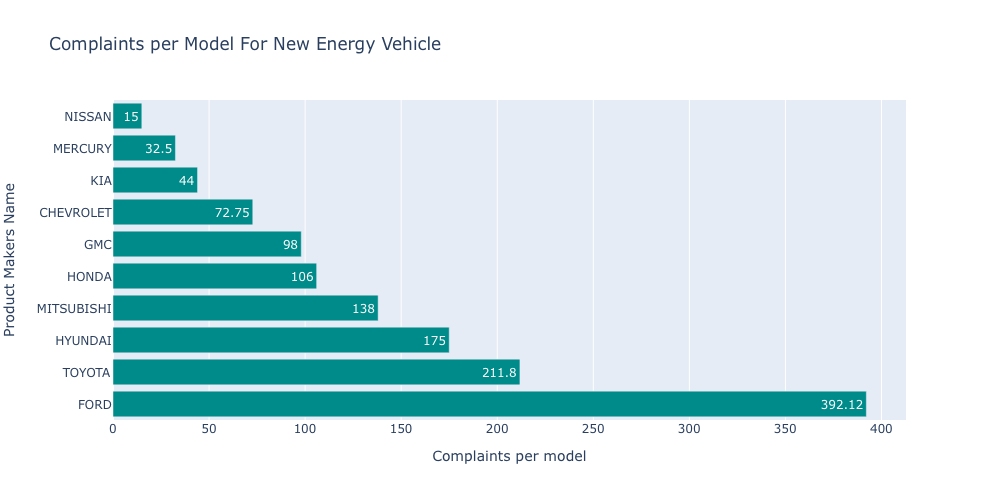

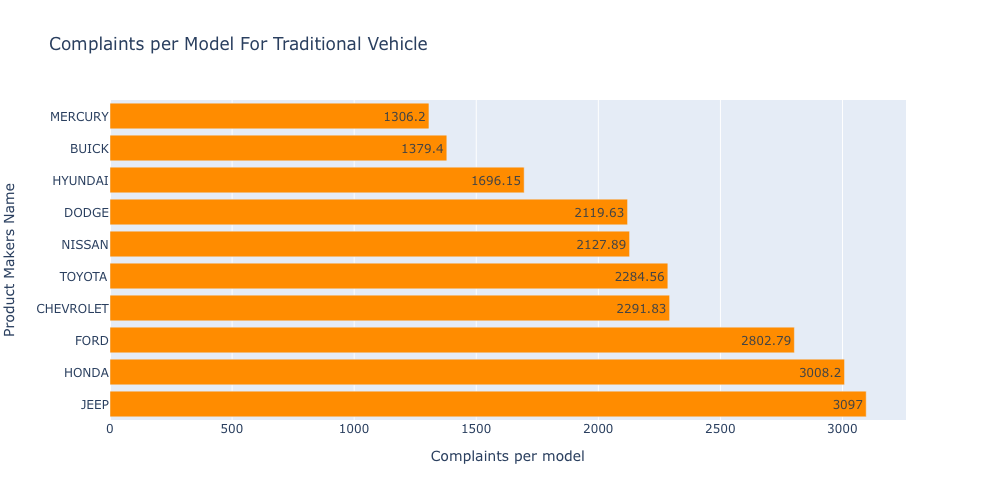

In [244]:
top_10 = compalint_ratio_NEV_round.head(10)
fig = px.bar(top_10, x=top_10['complaint_ratio'], y=top_10.index,
             #pattern_shape=make_complaints_count['productMake'],
             color_discrete_sequence=["darkcyan"],
             text_auto='',
             title="Complaints per Model For New Energy Vehicle",
             labels=({"complaint_ratio": "Complaints per model","productMake":"Product Makers Name"}),
             height=500)
fig.show()

top_10 = compalint_ratio_TV_round.head(10)
fig = px.bar(top_10, x=top_10['complaint_ratio'], y=top_10.index,
             #pattern_shape=make_complaints_count['productMake'],
             color_discrete_sequence=["darkorange"],
             text_auto='',
             title="Complaints per Model For Traditional Vehicle",
             labels=({"complaint_ratio": "Complaints per model","productMake":"Product Makers Name"}),
             height=500)
fig.show()

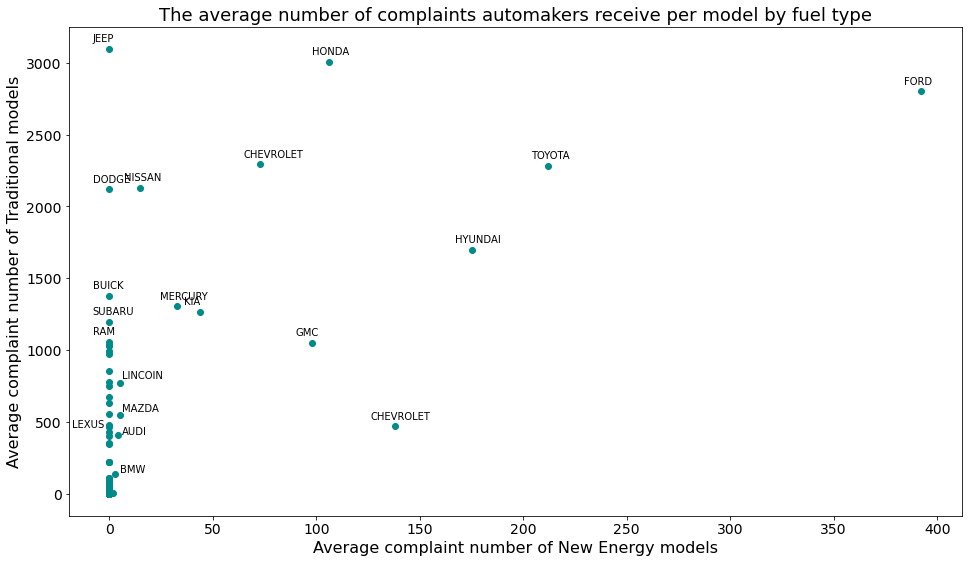

In [450]:
All_complaint_ratio = pd.concat([compalint_ratio_NEV_round['complaint_ratio'].rename('New_Energy'),
                                 compalint_ratio_TV_round['complaint_ratio'].rename('Traditional')],
                                axis=1)\
                        .fillna(0)

fig, ax = plt.subplots(figsize=(16, 9))

# Draw scatter plot
plt.scatter(data=All_complaint_ratio, x='New_Energy', y='Traditional',c='darkcyan')

# Label each node
All_complaint_ratio.sort_values(by='Traditional',ascending=False,inplace=True)
for i, txt in enumerate(All_complaint_ratio[All_complaint_ratio['Traditional']>1040].index):
    ax.annotate(txt, (All_complaint_ratio['New_Energy'][i]-8, All_complaint_ratio['Traditional'][i]+50))
ax.annotate('CHEVROLET', (126,518))
ax.annotate('AUDI', (6,410))
ax.annotate('BMW', (5,148))
ax.annotate('LINCOIN', (6,805))
ax.annotate('MAZDA',(6,570))
ax.annotate('LEXUS', (-18,465))


plt.title("The average number of complaints automakers receive per model by fuel type",fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Average complaint number of New Energy models", fontsize=16)
plt.ylabel("Average complaint number of Traditional models", fontsize=16)

plt.show()

# Save as png image
fig.savefig('./Outputs/Complaint_ratio_per_model_by_makes_by_fuel_type.png', format='png')

## Complaints Ratio X Manufacturer

In [427]:
# Get manufacturer info for each maker
manufacturer_info = df_complaints\
                    .groupby(['productMake','manufacturer'])\
                    .size()\
                    .reset_index()

# merge the previous ratio dataframe with manufacturer info
all_ratio_of_manufacturer = all_ratio.merge(manufacturer_info, 
                            left_on=all_ratio['productMake'],
                            right_on=manufacturer_info['productMake'], 
                            how='left')\
                            .groupby('manufacturer').mean().drop(columns=[0])\
                            .sort_values(by=['Traditional'],ascending=False)
# Round to percentage
all_ratio_of_manufacturer = all_ratio_of_manufacturer.applymap(lambda x: round(x,2))

all_ratio_of_manufacturer.head(13)

,New_Energy,Traditional
manufacturer,,
North Central Emergency Vehicles,392.12,2802.79
"Versalift East, LLC",392.12,2802.79
"ALL IN ONE MOBILITY, INC.",0.00,2119.63
Honda (American Honda Motor Co.),53.00,1894.43
Mobility Works (WMK Inc.),196.06,1402.39
Kia Motors America,44.00,1265.67
"Subaru of America, Inc.",0.00,1195.00
"General Motors, LLC",14.23,1042.70
Hyundai Motor America,87.50,862.41


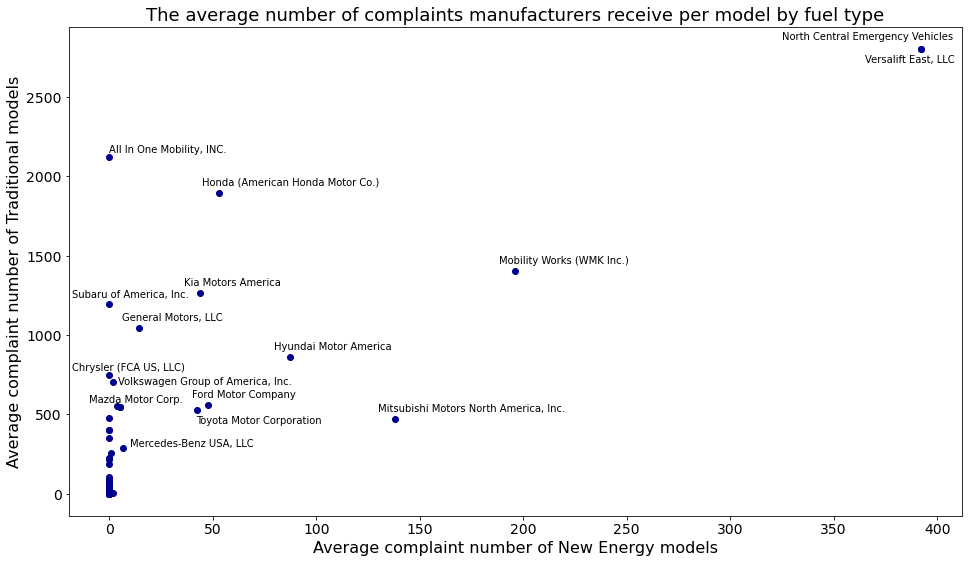

In [449]:
fig, ax = plt.subplots(figsize=(16, 9))

# Draw scatter plot
plt.scatter(data=all_ratio_of_manufacturer, x='New_Energy', y='Traditional',c='darkblue')

# Label each node
all_ratio_of_manufacturer.sort_values(by=['New_Energy','Traditional'],ascending=False,inplace=True)
for i, txt in enumerate(all_ratio_of_manufacturer.head(12).index):
    if txt not in ['North Central Emergency Vehicles','Versalift East, LLC','Mercedes-Benz USA, LLC',
                   'Toyota Motor Corporation','Mazda Motor Corp.']:
        ax.annotate(txt, (all_ratio_of_manufacturer['New_Energy'][i]-8, all_ratio_of_manufacturer['Traditional'][i]+50))
ax.annotate('North Central Emergency Vehicles', (325,2860))
ax.annotate('Versalift East, LLC', (365,2720))
ax.annotate('Toyota Motor Corporation', (42,444))
ax.annotate('Mazda Motor Corp.', (-10,575))
ax.annotate('Mercedes-Benz USA, LLC', (10,300))
ax.annotate('All In One Mobility, INC.', (0,2150))
ax.annotate('Subaru of America, Inc.', (-18,1240))
ax.annotate('Chrysler (FCA US, LLC)', (-18,780))
ax.annotate('Volkswagen Group of America, Inc.', (4,690))

plt.title("The average number of complaints manufacturers receive per model by fuel type",fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Average complaint number of New Energy models", fontsize=16)
plt.ylabel("Average complaint number of Traditional models", fontsize=16)

plt.show()

# Save as png image
fig.savefig('./Outputs/Complaint_ratio_per_model_by_manufacturers_by_fuel_type.png', format='png')

# Components
## Frequency Count For Each Components

In [168]:
df_complaints['components'].value_counts().head(6)

POWER TRAIN                  62788
AIR BAGS                     61857
ELECTRICAL SYSTEM            52507
STEERING                     45944
ENGINE AND ENGINE COOLING    38660
SERVICE BRAKES,HYDRAULIC     38648
Name: components, dtype: int64

**Each complaint may have mulitiple components at same time, we need split them by comma.**

In [169]:
def split_components(series):
 return pd.Series([x for list_ in series for x in list_.split(',')])
split_components(df_complaints['components'])

0                          STRUCTURE
1                             ENGINE
2                        POWER TRAIN
3                  ELECTRICAL SYSTEM
4                           AIR BAGS
                     ...            
1038506    ENGINE AND ENGINE COOLING
1038507                     STEERING
1038508        VEHICLE SPEED CONTROL
1038509                       ENGINE
1038510                     AIR BAGS
Length: 1038511, dtype: object

**Now we can count the frequency.**

In [170]:
valueCount = split_components(df_complaints['components'])\
                            .value_counts()\
                            .sort_values(ascending=False)
valueCount.head()

ELECTRICAL SYSTEM    102386
POWER TRAIN           93831
SERVICE BRAKES        86440
AIR BAGS              82026
STEERING              68543
dtype: int64

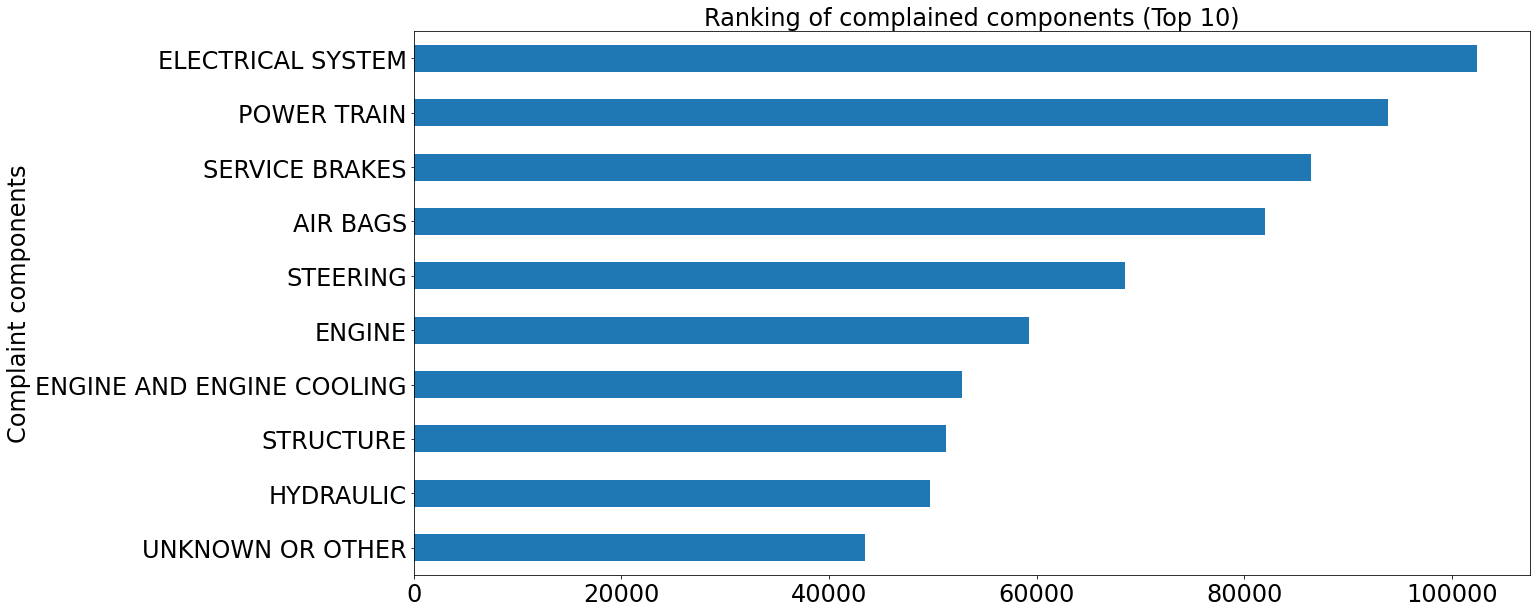

In [171]:
fig = plt.figure(figsize=(20,10))
# set up the bar chart
ax = valueCount.head(10).plot(kind="barh")
plt.title("Ranking of complained components (Top 10)", fontsize=24)
plt.ylabel("Complaint components", fontsize=24)
# increase the font sizes on the axes
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
ax.invert_yaxis()
# Save as png image
fig.savefig('./Outputs/Complaint_components_top10.png', format='png')

### Find most complaint component in ***new energy vehicle***

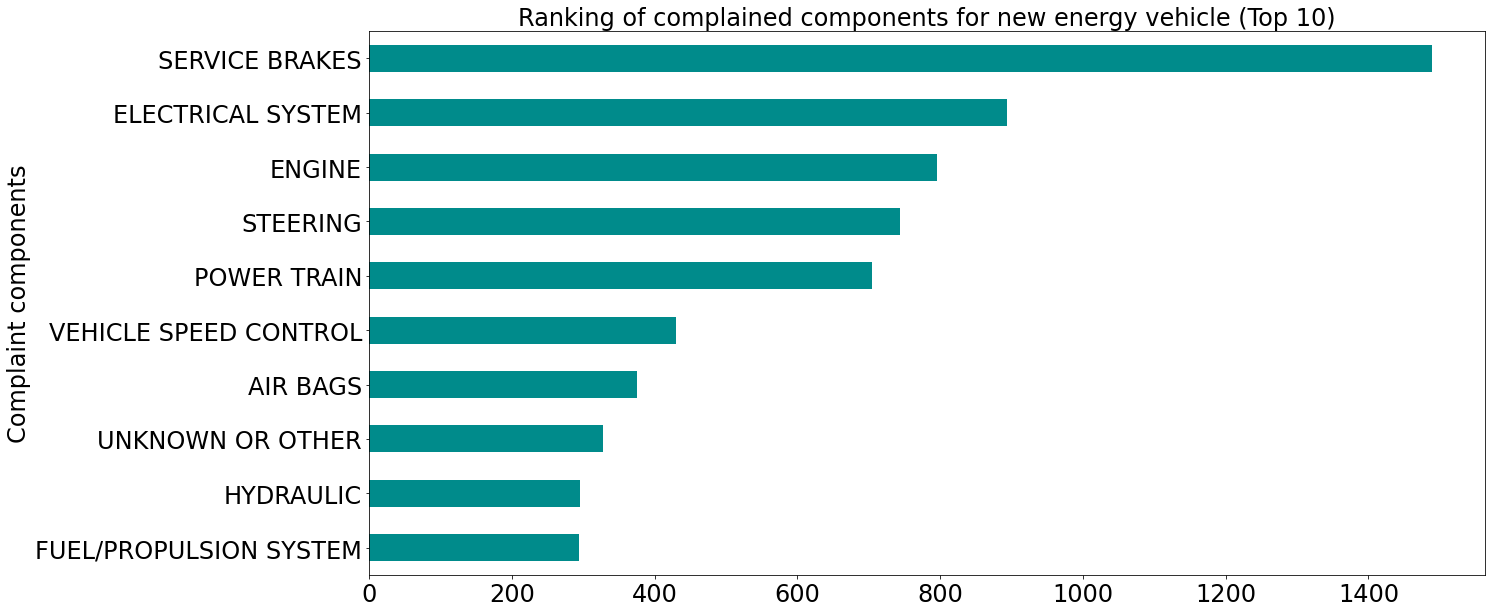

In [172]:
valueCount_with_nev = split_components(df_complaints[df_complaints['fuel_type']=='New energy']['components'])\
                            .value_counts()\
                            .sort_values(ascending=False)
valueCount_with_nev.head()

fig = plt.figure(figsize=(20,10))
# set up the bar chart
ax = valueCount_with_nev.head(10).plot(kind="barh",color="darkcyan")
plt.title("Ranking of complained components for new energy vehicle (Top 10)", fontsize=24)
plt.ylabel("Complaint components", fontsize=24)
# increase the font sizes on the axes
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
ax.invert_yaxis()
# Save as png image
fig.savefig('./Outputs/Complaint_components_for_NEV_top10.png', format='png')

### Find most complaint component in ***traditional vehicle***

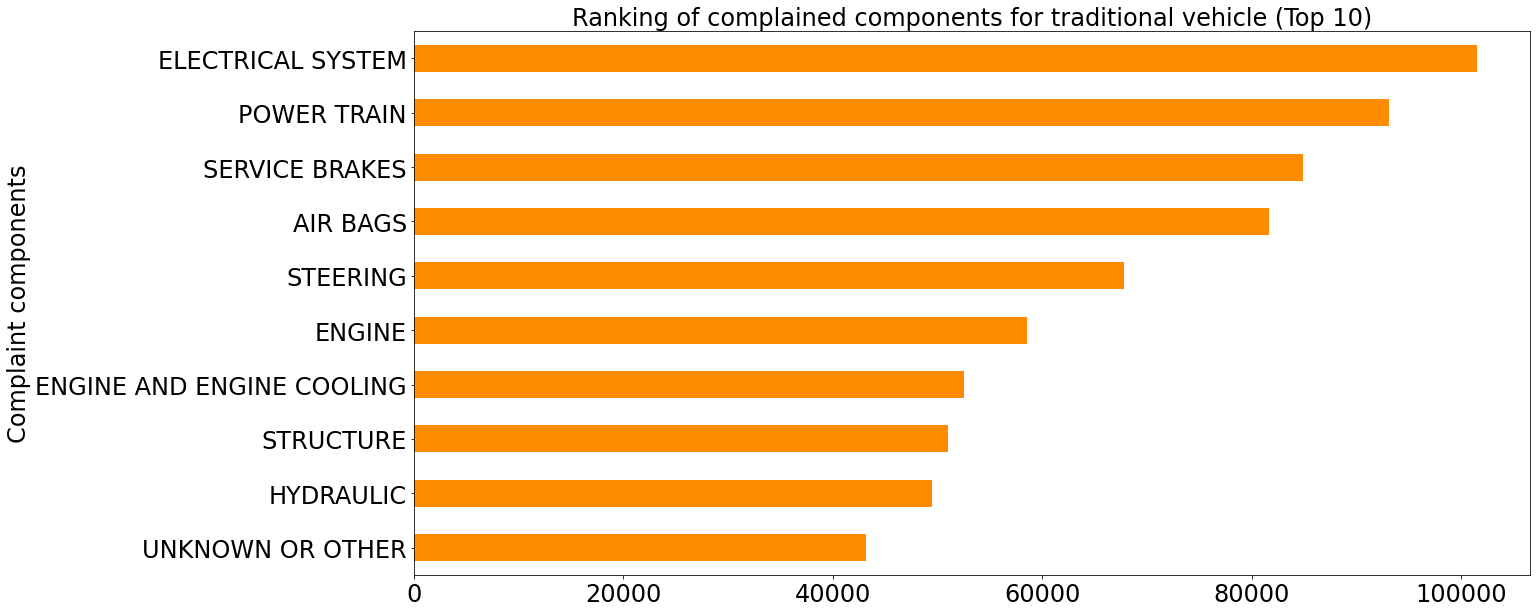

In [173]:
valueCount_with_tv = split_components(df_complaints[df_complaints['fuel_type']=='Traditional']['components'])\
                            .value_counts()\
                            .sort_values(ascending=False)
valueCount_with_tv.head()

fig = plt.figure(figsize=(20,10))
# set up the bar chart
ax = valueCount_with_tv.head(10).plot(kind="barh",color="darkorange")
plt.title("Ranking of complained components for traditional vehicle (Top 10)", fontsize=24)
plt.ylabel("Complaint components", fontsize=24)
# increase the font sizes on the axes
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
ax.invert_yaxis()
# Save as png image
fig.savefig('./Outputs/Complaint_components_for_TraditionalVehicle_top10.png', format='png')

## Whether it was triggered by a collision
### Components count in complaints in case of crash

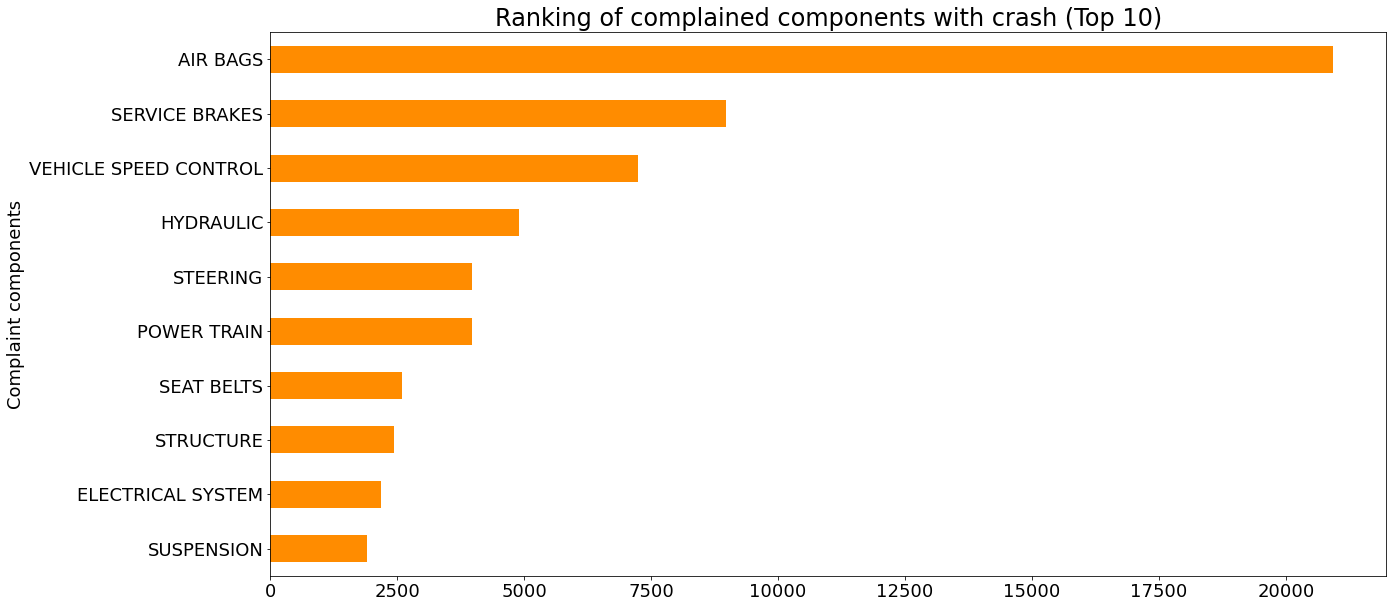

In [279]:
crash_t = df_complaints[df_complaints['crash']==True]
count_t = split_components(crash_t['components'])\
                            .value_counts()\
                            .sort_values(ascending=False)
# Draw a bar chart
plt.figure(figsize=(20,10))
# set up the bar chart
ax = count_t.head(10).plot(kind="barh",color="darkorange")
plt.title("Ranking of complained components with crash (Top 10)", fontsize=24)
plt.ylabel("Complaint components", fontsize=18)
# increase the font sizes on the axes
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
ax.invert_yaxis()
# Save as png image
fig.savefig('./Outputs/Complaint_components_with_crash.png', format='png')

### Components count in complaints without crash

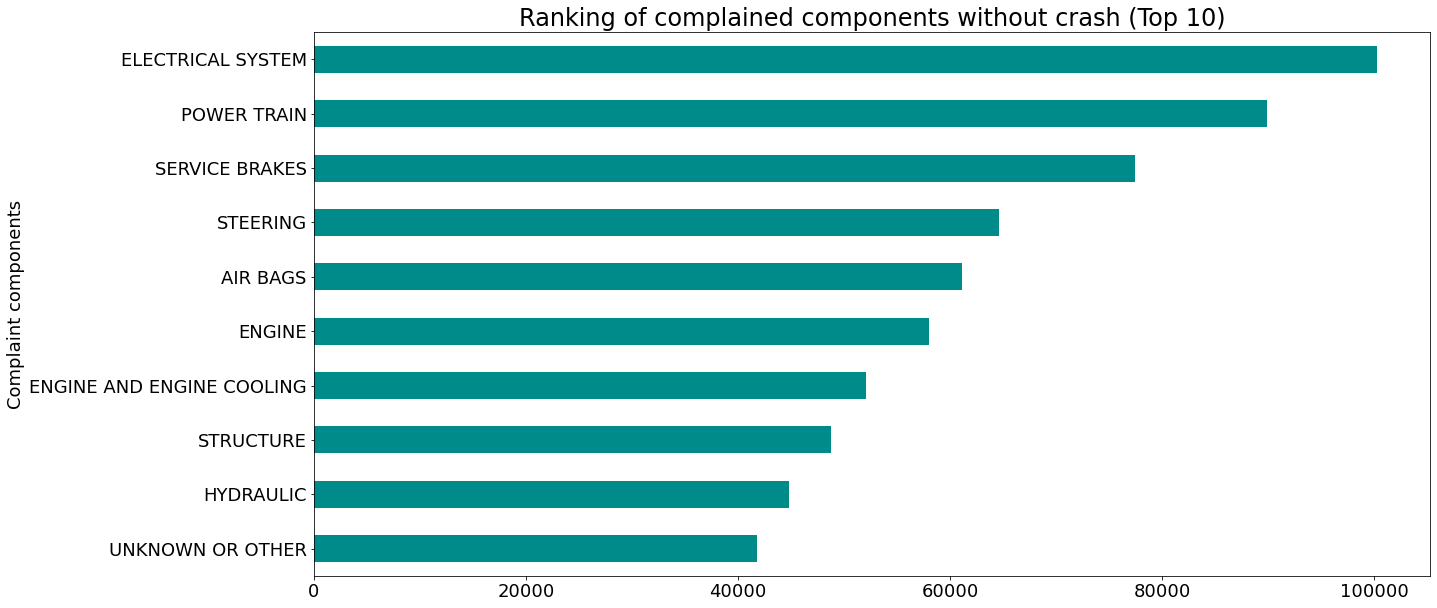

In [280]:
crash_f = df_complaints[df_complaints['crash']==False]
count_f = split_components(crash_f['components'])\
                            .value_counts()\
                            .sort_values(ascending=False)
# Draw a bar chart
plt.figure(figsize=(20,10))
# set up the bar chart
ax = count_f.head(10).plot(kind="barh",color="darkcyan")
plt.title("Ranking of complained components without crash (Top 10)", fontsize=24)
plt.ylabel("Complaint components", fontsize=18)
# increase the font sizes on the axes
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
ax.invert_yaxis()
# Save as png image
fig.savefig('./Outputs/Complaint_components_without_crash.png', format='png')

In [281]:
crash_f = df_complaints[df_complaints['crash']==False]
crash_t = df_complaints[df_complaints['crash']==True]
count_f = split_components(crash_f['components'])\
                            .value_counts()\
                            .sort_values(ascending=False)
count_t = split_components(crash_t['components'])\
                            .value_counts()\
                            .sort_values(ascending=False)
count_f = pd.DataFrame(count_f).rename(columns={0: 'normal'})
count_t = pd.DataFrame(count_t).rename(columns={0: 'crash'})
all_ = pd.concat([count_t, count_f], axis=1)
all_.head()

,crash,normal
AIR BAGS,20928.0,61098
SERVICE BRAKES,8972.0,77468
VEHICLE SPEED CONTROL,7245.0,35192
HYDRAULIC,4906.0,44830
STEERING,3965.0,64578


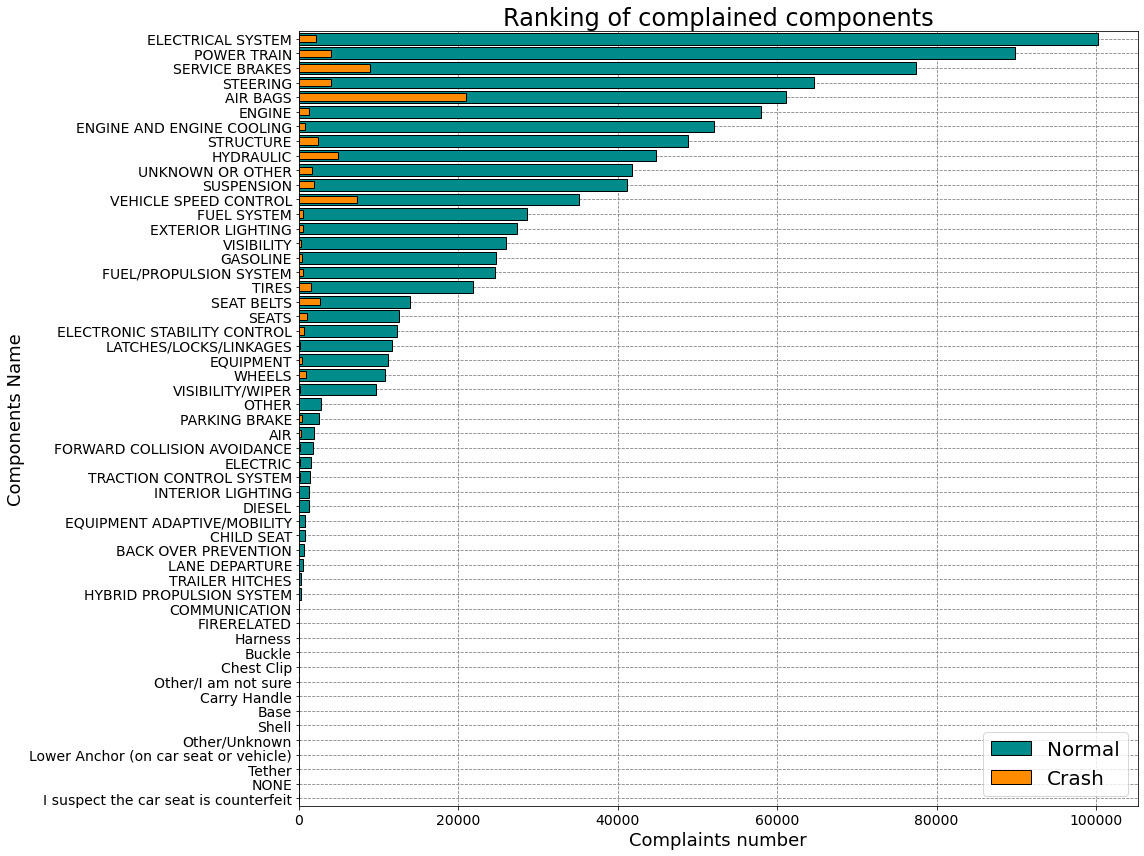

In [282]:
# Draw a bar chart
fig,ax = plt.subplots(figsize=(16,12))
all_ = all_.sort_values(by=('normal'),ascending=True)

# set up the bar chart
all_['normal'].plot(
    ax=ax,
    kind="barh",
    color="darkcyan",
    width=0.8,
    edgecolor='k',
    lw=1
)
all_['crash'].plot(
    ax=ax,
    kind="barh",
    color="darkorange",
    width=0.5,
    edgecolor='k',
    lw=1
)

# for index, value in enumerate(all_['normal']):
#     plt.text(value, index-0.25,str(value),fontsize=10)

plt.title("Ranking of complained components", fontsize=24)
plt.ylabel("Complaint components", fontsize=18)
# increase the font sizes on the axes
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.tick_params(labelsize=14)

ax.set_axisbelow(True)
ax.grid(color='gray', linestyle='dashed')

ax.set_xlabel('Complaints number',fontsize=18)
ax.set_ylabel('Components Name',fontsize=18)
ax.legend(['Normal','Crash'],loc='lower right',fontsize=20)

fig.tight_layout()
# Save as png image
fig.savefig('./Outputs/Complaint_components_rank.png', format='png')

## The correlation between these components
The number of times they were damaged at the same time

Get the boolean value of all components for each complaint

In [283]:
def df_bool_with_item(list_items, unique_items):
    bool_dict = {}
    
    # Loop through all the tags
    for i, item in enumerate(unique_items):
        
        # Apply boolean mask
        bool_dict[item] = list_items.apply(lambda x: item in x)
            
    return pd.DataFrame(bool_dict)

components_bool = df_bool_with_item(df_complaints['components'], valueCount.keys())
components_bool.head()

,ELECTRICAL SYSTEM,POWER TRAIN,SERVICE BRAKES,AIR BAGS,STEERING,ENGINE,ENGINE AND ENGINE COOLING,STRUCTURE,HYDRAULIC,UNKNOWN OR OTHER,...,Harness,Other/I am not sure,Base,Shell,Carry Handle,Other/Unknown,Tether,Lower Anchor (on car seat or vehicle),NONE,I suspect the car seat is counterfeit
0,False,False,False,False,False,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,True,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Get correlation for this dataframe

In [284]:
components_corr = components_bool.corr(method = "pearson")
components_corr.head()

,ELECTRICAL SYSTEM,POWER TRAIN,SERVICE BRAKES,AIR BAGS,STEERING,ENGINE,ENGINE AND ENGINE COOLING,STRUCTURE,HYDRAULIC,UNKNOWN OR OTHER,...,Harness,Other/I am not sure,Base,Shell,Carry Handle,Other/Unknown,Tether,Lower Anchor (on car seat or vehicle),NONE,I suspect the car seat is counterfeit
ELECTRICAL SYSTEM,1.000000,-0.072269,-0.080163,-0.072828,-0.048333,-0.022367,-0.054782,-0.060323,-0.078884,-0.011607,...,-0.001450,-0.001376,-0.001123,-0.001123,-0.001123,0.000478,-0.000794,-0.000794,-0.000459,-0.000459
POWER TRAIN,-0.072269,1.000000,-0.090960,-0.118550,-0.076405,-0.010807,-0.038221,-0.079012,-0.068814,-0.053815,...,-0.001379,-0.001309,-0.001068,-0.001068,-0.001068,-0.000975,-0.000756,-0.000756,-0.000436,-0.000436
SERVICE BRAKES,-0.080163,-0.090960,1.000000,-0.093985,-0.054436,-0.100901,-0.065730,-0.071034,0.741008,-0.062138,...,-0.001312,-0.001245,-0.001016,-0.001016,-0.001016,0.000694,-0.000719,-0.000719,-0.000415,-0.000415
AIR BAGS,-0.072828,-0.118550,-0.093985,1.000000,-0.084214,-0.127325,-0.087843,-0.053979,-0.075692,-0.049374,...,-0.001278,-0.001213,-0.000990,-0.000990,-0.000990,-0.000904,-0.000700,-0.000700,-0.000404,-0.000404
STEERING,-0.048333,-0.076405,-0.054436,-0.084214,1.000000,-0.081826,-0.062148,-0.062720,-0.054719,-0.053061,...,-0.001157,-0.001097,-0.000896,-0.000896,-0.000896,0.000974,-0.000634,-0.000634,-0.000366,-0.000366


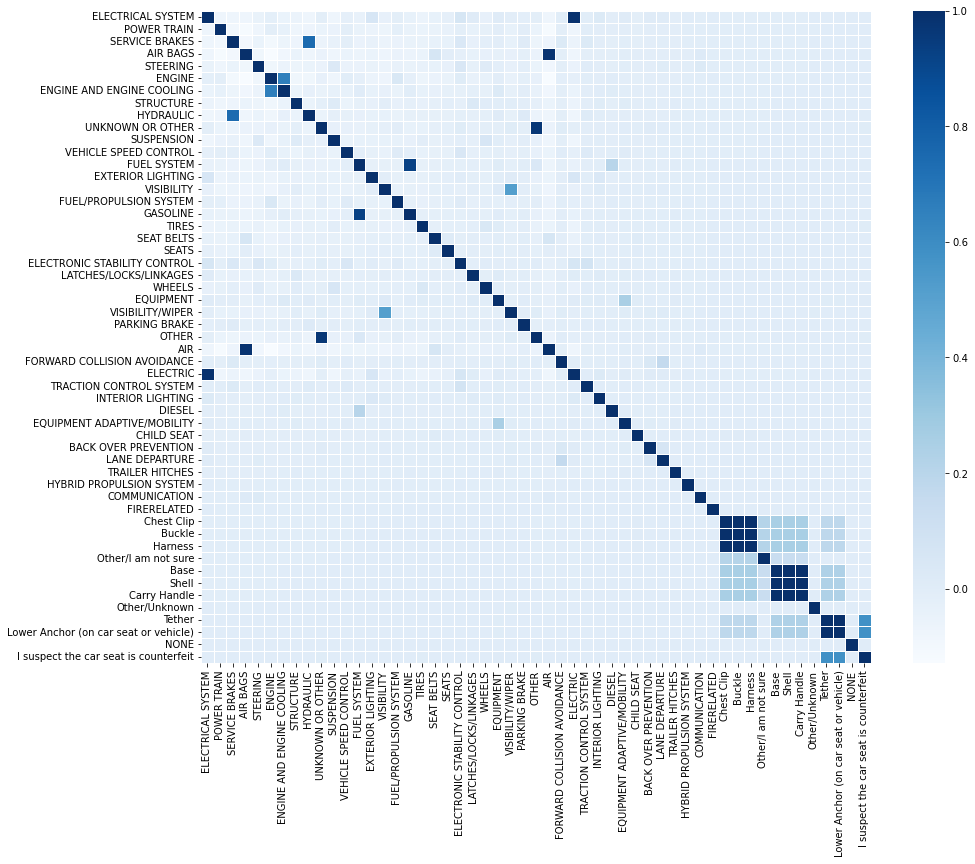

In [285]:
fig, ax = plt.subplots(figsize = (15,12))
sns.heatmap(components_corr,fmt="",cmap="Blues",linewidths=0.5, ax=ax)
# Save as png image
fig.savefig('./Outputs/Complaint_components_corr.png', format='png')